C:\Users\User\AppData\Local\Temp\ipykernel_8116\2425330741.py:211: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_8116\2425330741.py:212: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()
C:\Users\User\AppData\Local\Temp\ipykernel_8116\2425330741.py:213: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()
C:\Users\User\AppData\Local\Temp\ipykernel_8116\2425330741.py:214: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()


<Figure size 432x288 with 0 Axes>

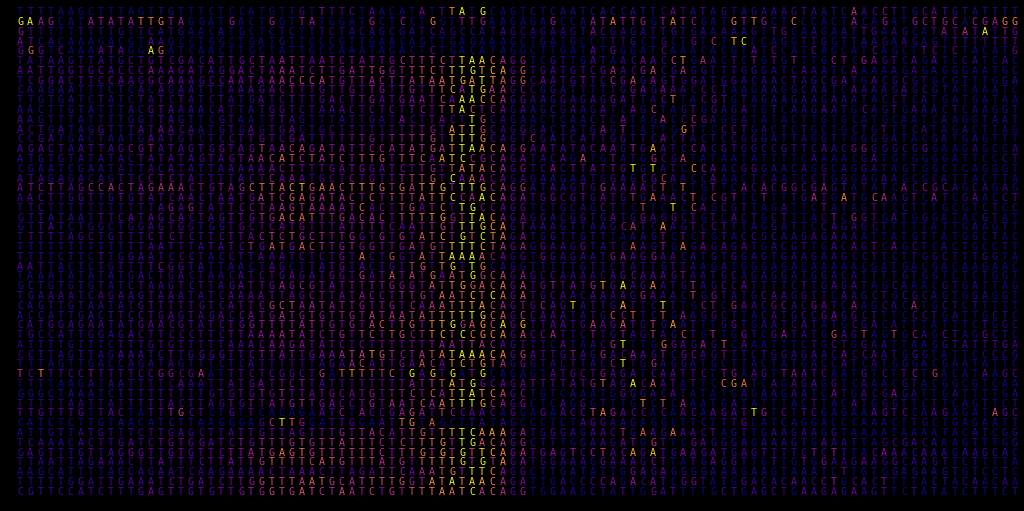

<Figure size 432x288 with 0 Axes>

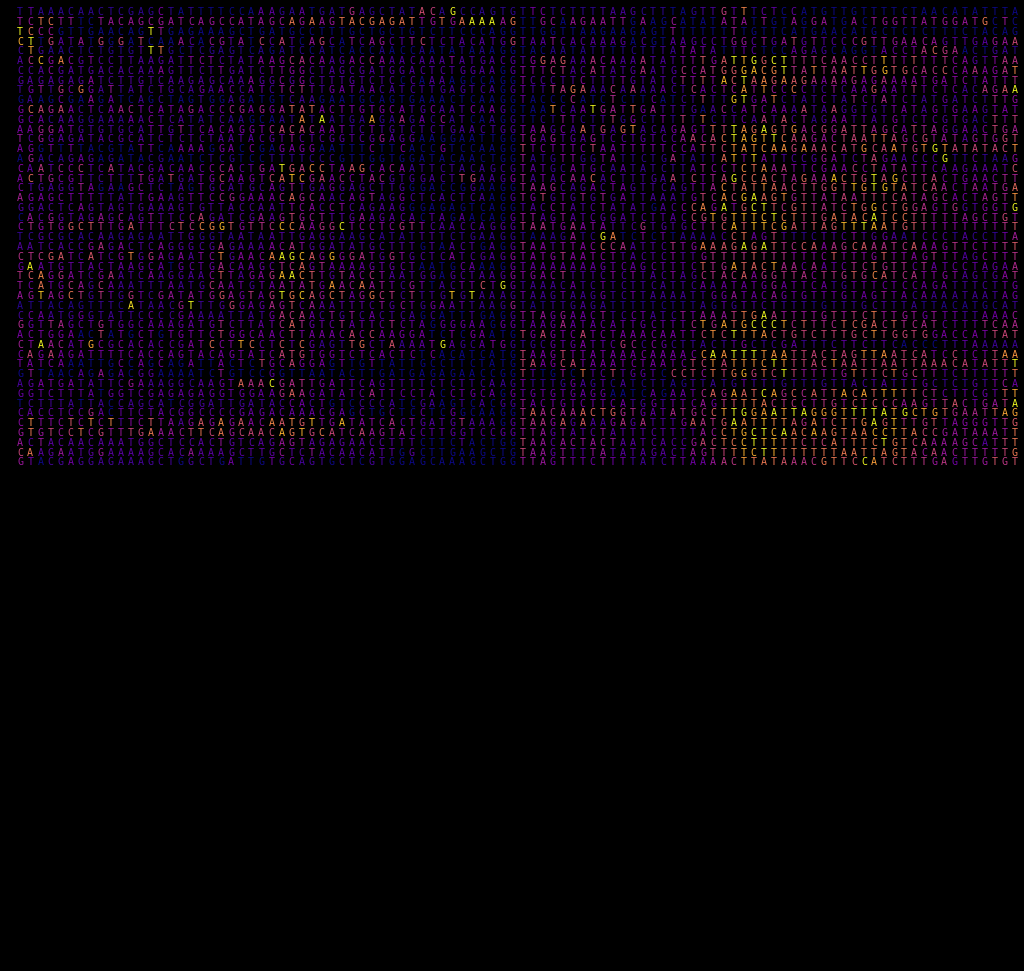

<Figure size 432x288 with 0 Axes>

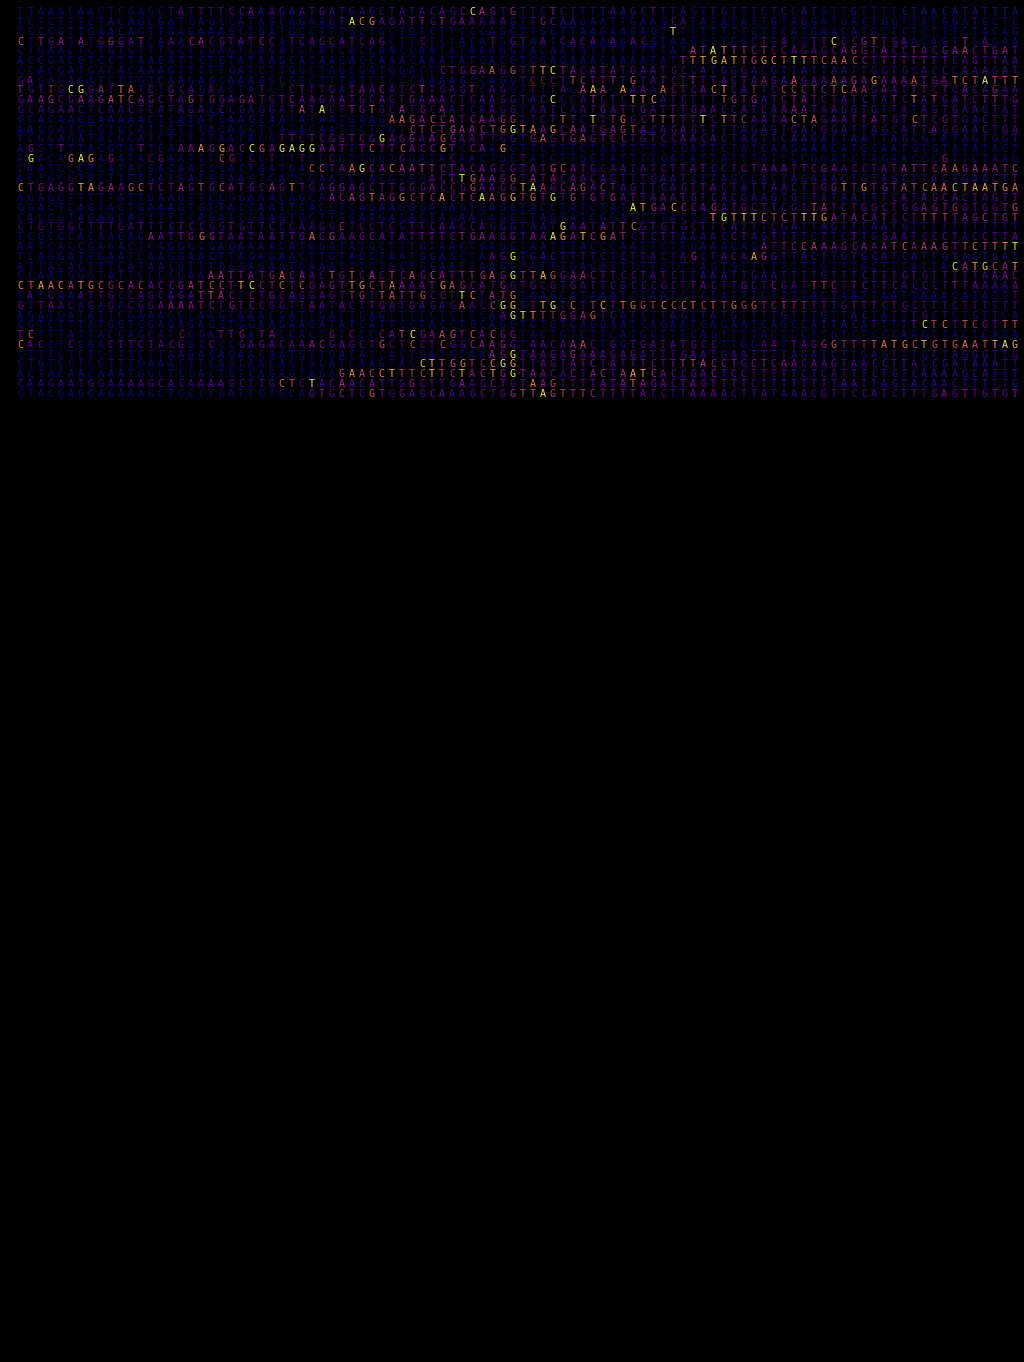

<Figure size 432x288 with 0 Axes>

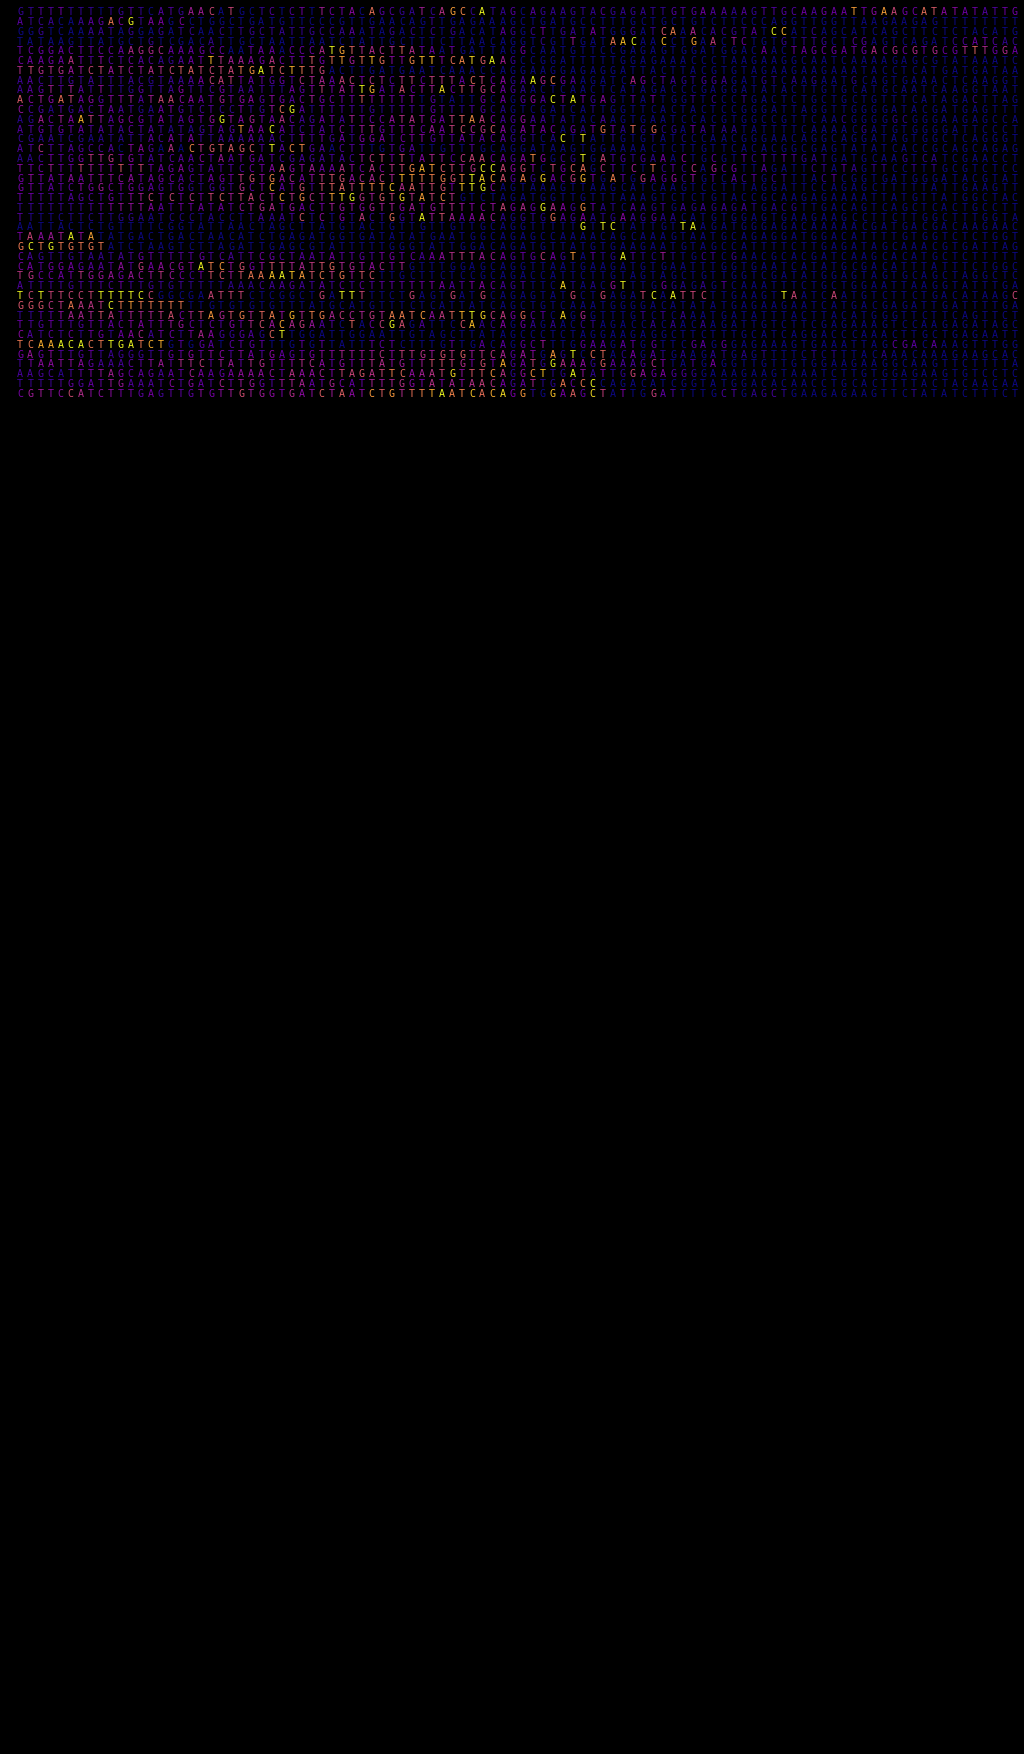

In [2]:
import pandas as pd

#table of the train data
raw_data = pd.read_json('C:\\Users\\User\\Downloads\\example_train_data.json',
                        lines=True,
                        orient='columns')

#acceptors positions in a list
acceptors = [484,760,942,1132,1559,
 355,758,1047,1228  ,  
 422,673,1321  ,
228,1202,1612, 1770, 1934, 2123, 2422, 3690, 4040, 4329, 4586,
750,2288,
164, 966, 1218, 1376, 1662, 2068, 2198,
277,749, 1007, 1369, 1656,
182,
184, 330, 448, 858, 1235, 1472,
421, 864, 967, 1058, 1143, 1351]

#acceptors positions in a list of lists
acceptors_2 = [[484,760,942,1132,1559],[355,758,1047,1228], [422,673,1321],
[228,1202,1612, 1770, 1934, 2123, 2422, 3690, 4040, 4329, 4586],
[750,2288],
[164, 966, 1218, 1376, 1662, 2068, 2198],
[277,749, 1007, 1369, 1656],
[182],
[184, 330, 448, 858, 1235, 1472],
[421, 864, 967, 1058, 1143, 1351]]

#donors positions in a list
donors =  [405,666,850,1034,1475,226,560,932,1154,327,524,883,69,917,1323,1695,1813,1995,2244,3587,3793,4161,4456, 33,2213, 73,877,1141,1299,1595,1993,2133,125,513,920,1291,1549, 87,65,230,379,776,1136,1391,79,486,915,995,1082,1296]

#donors positions in a list of lists
donors_2 =  [[405,666,850,1034,1475],[226,560,932,1154],[327,524,883],[69,917,1323,1695,1813,1995,2244,3587,3793,4161,4456], [33,2213], [73,877,1141,1299,1595,1993,2133],[125,513,920,1291,1549], [87],[65,230,379,776,1136,1391],[79,486,915,995,1082,1296]]

#attention data in a list of lists (each seq in a list and all sequences in a list)
with open('C:\\Users\\User\\Downloads\\attention_splice_acceptors.txt','r') as f:
    listl=[]
    for line in f:
        strip_lines=line.strip()
        listli=strip_lines.split()
        listl.append(listli)

with open('C:\\Users\\User\\Downloads\\attention_splice_donors.txt','r') as e:
    listl_donors=[]
    for line in e:
        strip_lines=line.strip()
        listld=strip_lines.split()
        listl_donors.append(listld)

#each list in listl is attention score list for an acceptor
#there are 10 sequences
score = []
for acceptor, score_list in zip(acceptors, listl):
    attention_around_acceptors = score_list[acceptor-50:acceptor+50] #acceptor is the acceptor position
    score.append(attention_around_acceptors)

#set a threshold
for i, list in enumerate(score):
    for j, value in enumerate(list):
            score[i][j]=float(value)

#each list in listl_donor is attention score list for a donors
#there are 10 sequences
score_donor = []
for donor, donor_score_list in zip(donors, listl_donors):
    attention_around_donors = donor_score_list[donor-50:donor+50] #donors is the acceptor position
    score_donor.append(attention_around_donors)

#set a threshold
for i, list in enumerate(score_donor):
    for j, value in enumerate(list):
            score_donor[i][j]=float(value)

#each list in listl is attention score list for an acceptor around donor position
#there are 10 sequences
acceptorScore_donorView = []
for donor, acceptor_score_list in zip(donors, listl):
    attention_around_donors_2 = acceptor_score_list[donor-50:donor+50] #donors is the acceptor position
    acceptorScore_donorView.append(attention_around_donors_2)

#set a threshold
for i, list in enumerate(acceptorScore_donorView):
    for j, value in enumerate(list):

            acceptorScore_donorView[i][j]=float(value)

#each list in listl is attention score list for a donor around acceptor position
#there are 10 sequences
donorScore_acceptorView = []
for acceptor, donor_score_list_2 in zip(acceptors, listl_donors):
    attention_around_acceptors_2 = donor_score_list_2[acceptor-50:acceptor+50] #donors is the acceptor position
    donorScore_acceptorView.append(attention_around_acceptors_2)

#set a threshold
for i, list in enumerate(donorScore_acceptorView):
    for j, value in enumerate(list):
            donorScore_acceptorView[i][j]=float(value)

#list  of strings
result = []
for j, acceptor_list in enumerate(acceptors_2):
        for i in acceptor_list:
            sequence_around_acceptor = raw_data["seq"][j][i-50:i+50] #i is the acceptor position
            result.append(sequence_around_acceptor)

#list  of strings donors
result_donors = []
for k, donor_list in enumerate(donors_2):
        for i in donor_list:
            sequence_around_donor = raw_data["seq"][k][i-50:i+50] #i is the donor position
            result_donors.append(sequence_around_donor)


result_donors.remove(result_donors[36])
result_donors.remove(result_donors[29])
score_donor.remove(score_donor[36])
donorScore_acceptorView.remove(donorScore_acceptorView[36])
donorScore_acceptorView.remove(donorScore_acceptorView[29])

import matplotlib.pyplot as plt
#result is a list of strings
#score is a list of lists of scores

xcoord = .0
ycoord = .0
fig = plt.figure()
cm = plt.get_cmap("plasma")

fig, ax1= plt.subplots(1,figsize = (12, 6))
plt.style.use('dark_background')
ax1.axis('off')

for (attention, sequence) in zip(score, result):
    if (len(attention)) ==100 and (len(sequence)==100):
        ycoord += .03 
        xcoord = .0
        for a, char in enumerate(sequence):
           
                xcoord += .015
                ax1.text(xcoord,ycoord, char, color=cm.colors[int((float(attention[a]))/(max(attention))* 255)], fontfamily="monospace")
               


    else:
        continue;

fig2 = plt.figure()
fig2, ax2= plt.subplots(figsize = (12, 6))
ax2.axis('off')
plt.style.use('dark_background')

cm2 = plt.get_cmap("plasma")
for (attention, sequence) in zip(score_donor, result_donors):
    if (len(attention)) ==100 and (len(sequence)==100):
        ycoord += .03 
        xcoord = .0
        for a, char in enumerate(sequence):

                xcoord += .015
                ax2.text(xcoord,ycoord, char, color=cm2.colors[int((float(attention[a]))/(max(attention))* 255)], fontfamily="monospace")           
                


    else:
        continue;

fig3 = plt.figure()
fig3, ax3= plt.subplots(figsize = (12, 6))
ax3.axis('off')
plt.style.use('dark_background')

#acceptor score around donor position #result_donors is sequences for donor and #acceptorScore_donorView is the score of acceptor at donor position


cm3 = plt.get_cmap("plasma")
for (attention, sequence) in zip(acceptorScore_donorView, result_donors):
    if (len(attention)) ==100 and (len(sequence)==100) and max(attention)!=0:
        ycoord += .03 
        xcoord = .0
        for a, char in enumerate(sequence):

                xcoord += .015
              
                ax3.text(xcoord,ycoord, char, color=cm3.colors[int((float(attention[a]))/(max(attention))* 255)], fontfamily="monospace")           
                


    else:
        continue;

#donor score around acceptor position #result is sequences for acceptor and #donorScore_acceptorView is the score of donor at acceptor position
fig4 = plt.figure()
fig4, ax4= plt.subplots(figsize = (12, 6))
ax4.axis('off')
plt.style.use('dark_background')
cm4 = plt.get_cmap("plasma")
for (attention, sequence) in zip(donorScore_acceptorView, result):
    if (len(attention)) ==100 and (len(sequence)==100) and max(attention)!=0:
        ycoord += .03 
        xcoord = .0
        for a, char in enumerate(sequence):
               
                xcoord += .015
                ax4.text(xcoord,ycoord, char, color=cm4.colors[int((float(attention[a]))/(max(attention))* 255)], fontfamily="monospace")           
                


    else:
        continue;
fig.show()
fig2.show()
fig3.show()
fig4.show()


image.png

image.png

image.png

image.png